In [12]:
pip install pandas numpy matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

# Load the training dataset
df = pd.read_csv("C:/Users/zarap/Downloads/Kaggle(Airlines)/test.csv")

# Look at the first rows
print(df.head())

# Get dataset info
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

### Basic Exploration (Check customers' satisfaction rate)

In [15]:
# Distribution of target variable
print(df['satisfaction'].value_counts())

# Convert target to numeric (0 = unsatisfied, 1 = satisfied)
df['satisfaction'] = df['satisfaction'].map({'satisfied': 1, 'neutral or dissatisfied': 0})

# Quick description
print(df.describe())

satisfaction
neutral or dissatisfied    14573
satisfied                  11403
Name: count, dtype: int64
         Unnamed: 0             id           Age  Flight Distance  \
count  25976.000000   25976.000000  25976.000000     25976.000000   
mean   12987.500000   65005.657992     39.620958      1193.788459   
std     7498.769632   37611.526647     15.135685       998.683999   
min        0.000000      17.000000      7.000000        31.000000   
25%     6493.750000   32170.500000     27.000000       414.000000   
50%    12987.500000   65319.500000     40.000000       849.000000   
75%    19481.250000   97584.250000     51.000000      1744.000000   
max    25975.000000  129877.000000     85.000000      4983.000000   

       Inflight wifi service  Departure/Arrival time convenient  \
count           25976.000000                       25976.000000   
mean                2.724746                           3.046812   
std                 1.335384                           1.533371   
min  

### Breaking down further to show customers with different travel class and their satisfaction

Raw counts:
 satisfaction     0     1
Class                   
Business      3809  8686
Eco           9322  2242
Eco Plus      1442   475

Percentages:
 satisfaction          0          1
Class                             
Business      30.484194  69.515806
Eco           80.612245  19.387755
Eco Plus      75.221701  24.778299


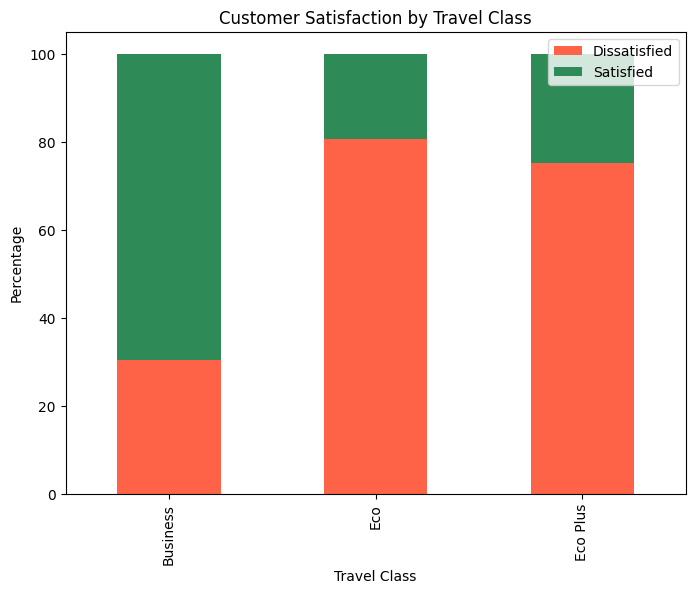

In [17]:
# Count satisfaction by travel class
class_counts = df.groupby(['Class', 'satisfaction']).size().unstack()

# Calculate percentages
class_percentages = class_counts.div(class_counts.sum(axis=1), axis=0) * 100

print("Raw counts:\n", class_counts)
print("\nPercentages:\n", class_percentages)

# Bar plot
import matplotlib.pyplot as plt
import seaborn as sns

class_percentages.plot(kind='bar', stacked=True, figsize=(8,6), color=['tomato', 'seagreen'])
plt.title("Customer Satisfaction by Travel Class")
plt.ylabel("Percentage")
plt.xlabel("Travel Class")
plt.legend(["Dissatisfied", "Satisfied"])
plt.show()

### Visualize Service Factors (Finding out what factors were customers satisfied with) (Eco and Eco Plus)

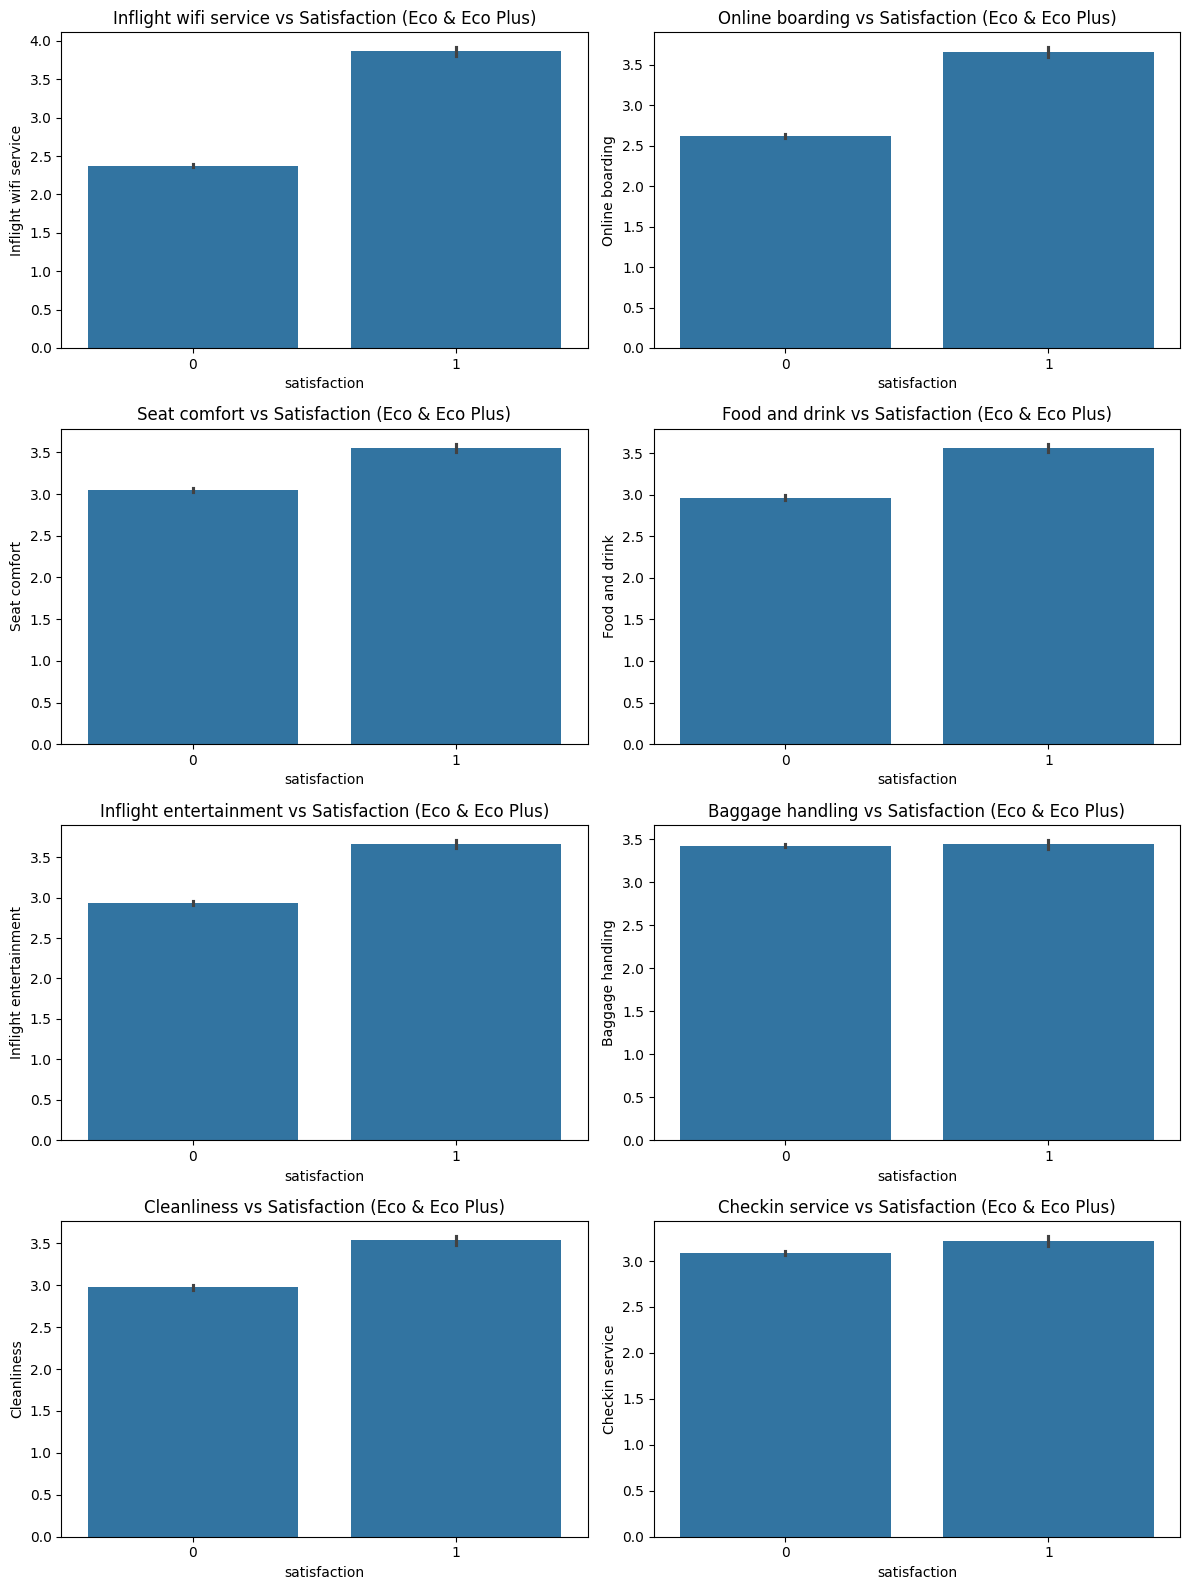

satisfaction
0    79.845709
1    20.154291
Name: proportion, dtype: float64


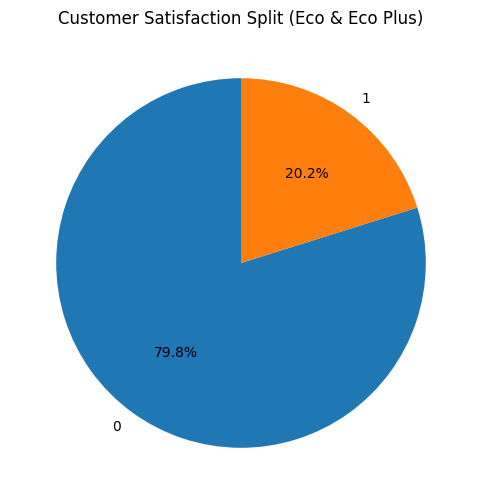

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter dataset to only Eco and Eco Plus customers
eco_df = df[df['Class'].isin(['Eco', 'Eco Plus'])]

# Service columns
service_cols = [
    'Inflight wifi service', 'Online boarding', 'Seat comfort',
    'Food and drink', 'Inflight entertainment', 'Baggage handling',
    'Cleanliness', 'Checkin service'
]

# Set up subplot grid (4 rows, 2 columns for 8 factors)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through service columns and plot
for i, col in enumerate(service_cols):
    sns.barplot(data=eco_df, x='satisfaction', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Satisfaction (Eco & Eco Plus)")

plt.tight_layout()
plt.show()

# Count satisfaction for Eco & Eco Plus only
satisfaction_counts = eco_df['satisfaction'].value_counts(normalize=True) * 100
print(satisfaction_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Satisfaction Split (Eco & Eco Plus)")
plt.show()


### Visualize Service Factors (Finding out what factors were customers satisfied with) (Business)

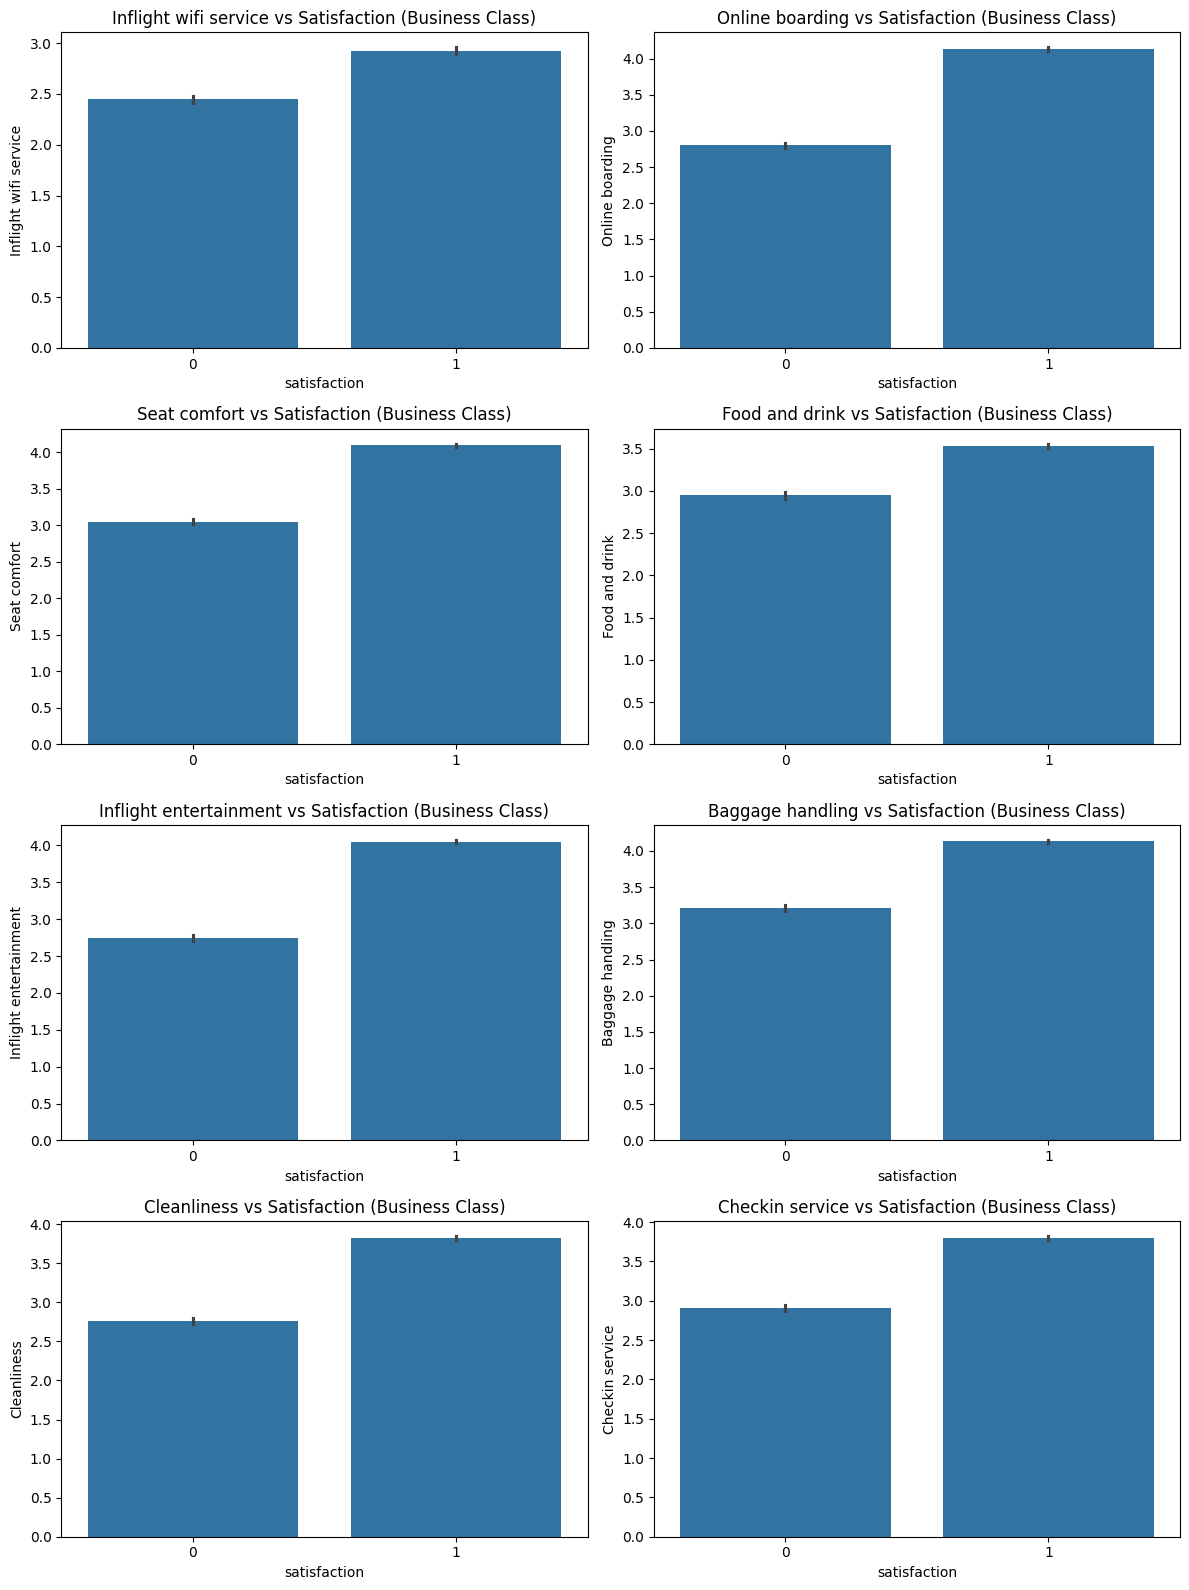

satisfaction
1    69.515806
0    30.484194
Name: proportion, dtype: float64


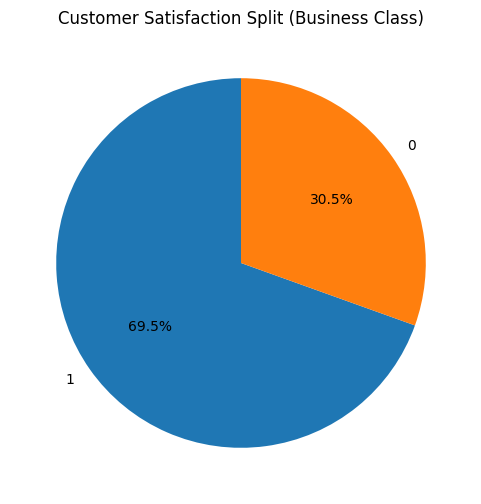

In [21]:
# Filter dataset to only Business class customers
business_df = df[df['Class'] == 'Business']

# Service columns
service_cols = [
    'Inflight wifi service', 'Online boarding', 'Seat comfort',
    'Food and drink', 'Inflight entertainment', 'Baggage handling',
    'Cleanliness', 'Checkin service'
]

# Set up subplot grid (4 rows, 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(12, 16))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through service columns and plot
for i, col in enumerate(service_cols):
    sns.barplot(data=business_df, x='satisfaction', y=col, ax=axes[i])
    axes[i].set_title(f"{col} vs Satisfaction (Business Class)")

plt.tight_layout()
plt.show()

# Count satisfaction for Business class only
satisfaction_counts = business_df['satisfaction'].value_counts(normalize=True) * 100
print(satisfaction_counts)

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Customer Satisfaction Split (Business Class)")
plt.show()


### Predicting Models 

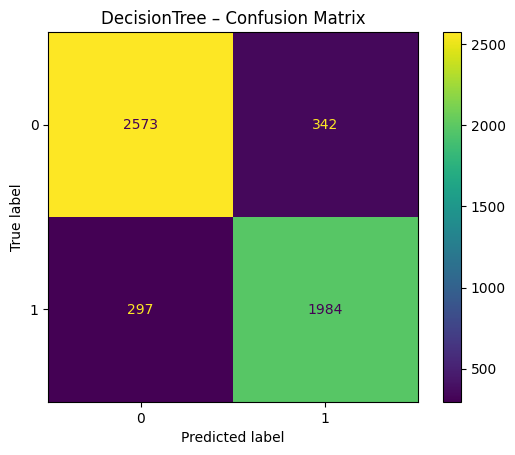

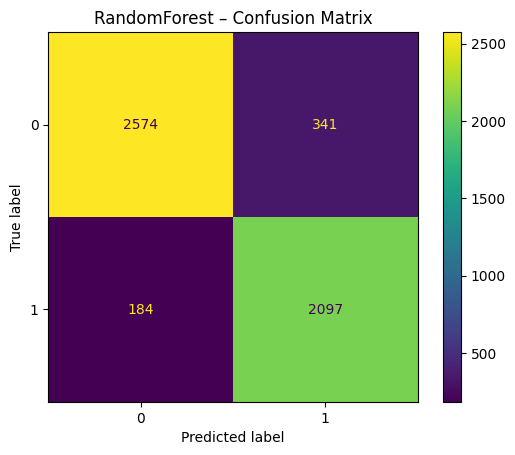

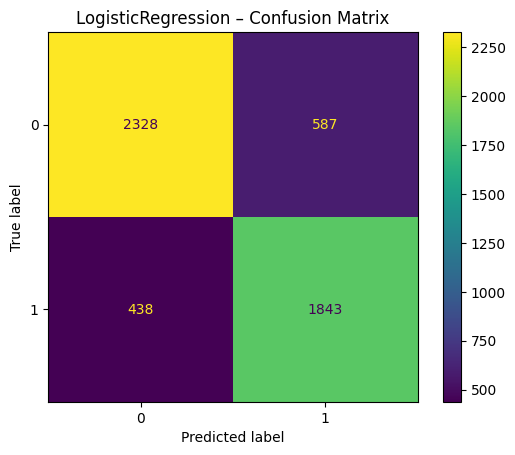

                Model  Accuracy  Precision    Recall        F1   ROC_AUC
1        RandomForest  0.898961   0.860131  0.919334  0.888748  0.964465
0        DecisionTree  0.877021   0.852966  0.869794  0.861298  0.943509
2  LogisticRegression  0.802733   0.758436  0.807979  0.782424  0.870750


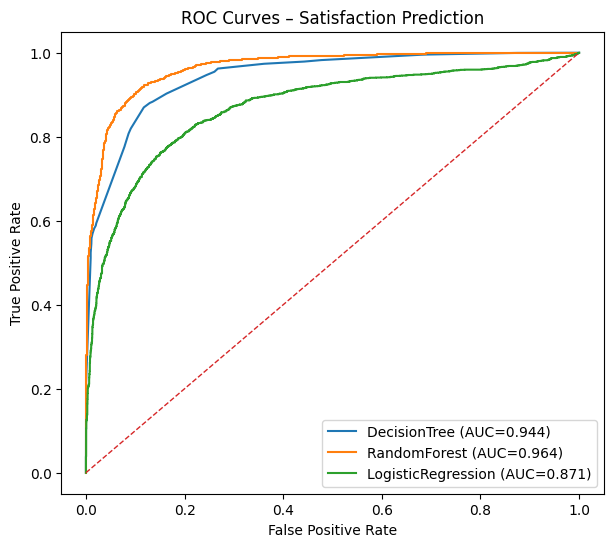

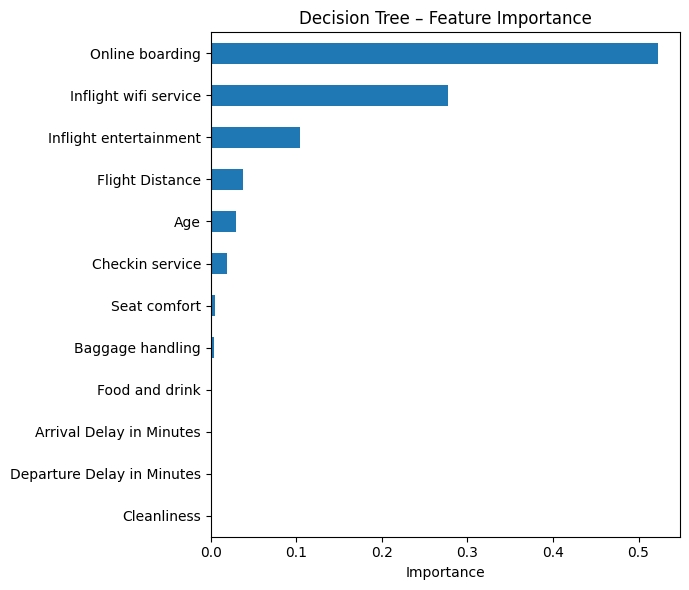

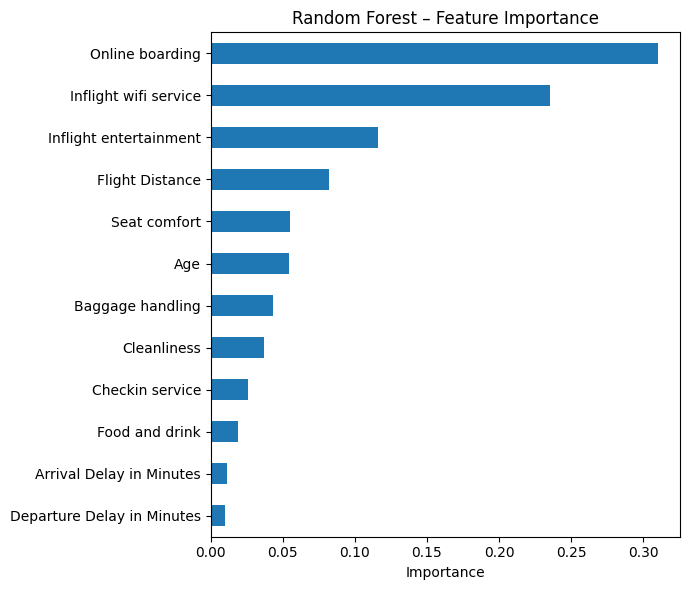

In [23]:
# === MODELS: Decision Tree, Random Forest, Logistic Regression ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

# 1) ---- Feature set (pick what's available) ----
service_cols = [
    'Inflight wifi service','Online boarding','Seat comfort','Food and drink',
    'Inflight entertainment','Baggage handling','Cleanliness','Checkin service'
]
extra_numeric = [
    'Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes','Age'
]
use_cols = [c for c in service_cols + extra_numeric if c in df.columns]

X = df[use_cols].copy()
y = df['satisfaction'].astype(int)

# Optional: simple imputation for any missing numeric values
X = X.fillna(X.median())

# 2) ---- Train / Test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 3) ---- Define models ----
models = {
    "DecisionTree": DecisionTreeClassifier(
        max_depth=6, min_samples_split=50, class_weight='balanced', random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=None, min_samples_split=50,
        class_weight='balanced', n_jobs=-1, random_state=42
    ),
    # Logistic Regression benefits from scaling
    "LogisticRegression": Pipeline([
        ('scaler', StandardScaler()),
        ('logreg', LogisticRegression(max_iter=2000, class_weight='balanced', n_jobs=-1))
    ])
}

# 4) ---- Fit, evaluate, and collect metrics ----
results = []
probas = {}   # store predicted probabilities for ROC

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # get positive-class probabilities for ROC/AUC
    if name == "LogisticRegression":
        y_proba = model.predict_proba(X_test)[:,1]
    else:
        y_proba = model.predict_proba(X_test)[:,1]
    probas[name] = y_proba

    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1": f1_score(y_test, y_pred, zero_division=0),
        "ROC_AUC": roc_auc_score(y_test, y_proba)
    }
    results.append(metrics)

    # Confusion matrix
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.ax_.set_title(f"{name} – Confusion Matrix")
    plt.show()

# 5) ---- Summary table ----
results_df = pd.DataFrame(results).sort_values("ROC_AUC", ascending=False)
print(results_df)

# 6) ---- ROC curves ----
plt.figure(figsize=(7,6))
for name, y_proba in probas.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1],[0,1],'--', linewidth=1)
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Satisfaction Prediction")
plt.legend()
plt.show()

# 7) ---- Feature importance for tree-based models ----
def plot_importance(model, title):
    importances = pd.Series(model.feature_importances_, index=use_cols).sort_values(ascending=True)
    plt.figure(figsize=(7,6))
    importances.plot(kind='barh')
    plt.title(title)
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()

plot_importance(models["DecisionTree"], "Decision Tree – Feature Importance")
plot_importance(models["RandomForest"], "Random Forest – Feature Importance")

# Loop through models and plot confusion matrices
for ax, (name, model) in zip(axes, models.items()):
    y_pred = model.predict(X_test)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap="viridis", colorbar=False)
    ax.set_title(f"{name} – Confusion Matrix")


In [24]:
import numpy as np
import pandas as pd

# --- Extract importances / coefficients ---
dt_imp = pd.Series(models["DecisionTree"].feature_importances_, index=use_cols, name="DT_importance")

rf_imp = pd.Series(models["RandomForest"].feature_importances_, index=use_cols, name="RF_importance")

# LogisticRegression is inside the pipeline
logreg = models["LogisticRegression"].named_steps['logreg']
coef = pd.Series(logreg.coef_[0], index=use_cols, name="LogReg_coef")
odds = np.exp(coef)  # multiplier on odds for a +1 change in the feature
odds = odds.rename("LogReg_odds_mult")

# --- Combine into one table ---
comp = pd.concat([dt_imp, rf_imp, coef, odds], axis=1)

# Nice formatting
comp["DT_importance_%"] = 100 * comp["DT_importance"] / (comp["DT_importance"].sum() or 1)
comp["RF_importance_%"] = 100 * comp["RF_importance"] / (comp["RF_importance"].sum() or 1)

# Sort by the strongest overall signal (random forest importance is usually most robust)
comp_sorted = comp.sort_values("RF_importance", ascending=False)

# Display
pd.options.display.float_format = "{:,.3f}".format
print("=== Feature Importance / Coefficient Comparison ===")
display(comp_sorted[[
    "DT_importance_%", "RF_importance_%", "LogReg_coef", "LogReg_odds_mult"
]])

=== Feature Importance / Coefficient Comparison ===


,DT_importance_%,RF_importance_%,LogReg_coef,LogReg_odds_mult
Online boarding,52.233,31.002,0.918,2.505
Inflight wifi service,27.758,23.567,0.236,1.267
Inflight entertainment,10.439,11.581,0.662,1.938
Flight Distance,3.780,8.170,0.530,1.699
Seat comfort,0.488,5.525,0.075,1.077
Age,3.004,5.434,0.059,1.060
Baggage handling,0.352,4.322,0.254,1.289
Cleanliness,0.000,3.723,0.045,1.046
Checkin service,1.938,2.579,0.329,1.389
Food and drink,0.007,1.910,-0.139,0.870
